What is the purpose of our web app we're developing? 
Were creating a webb app to view the inventory of a car delership in an interactive way. 

Lets start with importing and analying the data 

\

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np 
import streamlit as st
import plotly.express as px
import altair as al 
import matplotlib.pyplot as plt
plt.ion()


In [ ]:
#importing, dropping duplicated, and printing a small sample 
car_ad_df = pd.read_csv("vehicles_us.csv")

car_ad_df = car_ad_df.drop_duplicates()


print(car_ad_df.sample(5))



       price  model_year            model  condition  cylinders fuel  \
41466   9997      2017.0         kia soul  excellent        4.0  gas   
31224   2700      2004.0    ford explorer  excellent        6.0  gas   
25050   4995      2012.0         kia soul       good        4.0  gas   
27756   2995      2004.0  ford expedition       good        8.0  gas   
47845  14995      2008.0   toyota 4runner       good        6.0  gas   

       odometer transmission   type paint_color  is_4wd date_posted  \
41466   30783.0    automatic    SUV        grey     NaN  2018-05-10   
31224  195000.0    automatic    SUV       white     1.0  2018-09-10   
25050  170448.0    automatic  wagon       green     NaN  2018-11-24   
27756  308765.0    automatic  wagon       black     NaN  2018-11-24   
47845   46691.0    automatic    SUV      silver     1.0  2018-12-12   

       days_listed  
41466           15  
31224           25  
25050          105  
27756            8  
47845           34  


In [4]:
#checking to see how many Nan values are present in database
print(car_ad_df.isnull().sum())

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


#Has quite a bit of missing values in severeal differnet columns 
#Dont want to erase the extire row or column as there may be important information in the associated row or columns 
#for all the numerical columns ill be replaceing the 'Nan' value with 0, and for the string column/s I'll be replacing the Nan value with "Unkown 

In [5]:
car_ad_df['model_year'] = car_ad_df['model_year'].fillna(car_ad_df.groupby('model')['model_year'].transform('median'))
car_ad_df['odometer'] = car_ad_df['odometer'].fillna(car_ad_df.groupby('model_year')['odometer'].transform('median'))
car_ad_df['cylinders'] = car_ad_df['cylinders'].fillna(car_ad_df.groupby(['model', 'fuel'])['cylinders'].transform('median'))
car_ad_df['paint_color'] = car_ad_df['paint_color'].fillna("Unkown")
car_ad_df['is_4wd'] = car_ad_df['is_4wd'].fillna(0)

In [6]:
print(car_ad_df.describe())
print(car_ad_df.info())

               price    model_year     cylinders       odometer        is_4wd  \
count   51525.000000  51525.000000  51520.000000   51524.000000  51525.000000   
mean    12132.464920   2009.793954      6.123185  115199.710252      0.496303   
std     10040.803015      6.099296      1.658501   62083.200279      0.499991   
min         1.000000   1908.000000      3.000000       0.000000      0.000000   
25%      5000.000000   2007.000000      4.000000   73500.000000      0.000000   
50%      9000.000000   2011.000000      6.000000  114074.000000      0.000000   
75%     16839.000000   2014.000000      8.000000  152862.000000      1.000000   
max    375000.000000   2019.000000     12.000000  990000.000000      1.000000   

       days_listed  
count  51525.00000  
mean      39.55476  
std       28.20427  
min        0.00000  
25%       19.00000  
50%       33.00000  
75%       53.00000  
max      271.00000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data 

In [7]:
print(car_ad_df['type'].unique())
print(car_ad_df['condition'].unique())

['SUV' 'pickup' 'sedan' 'truck' 'coupe' 'van' 'convertible' 'hatchback'
 'wagon' 'mini-van' 'other' 'offroad' 'bus']
['good' 'like new' 'fair' 'excellent' 'salvage' 'new']


#SDA analysis & questions 

How many cars under 1ook miles are in excellent condition? 
How many cars fit this crtieria: the model year 2010 and over, are an automatic transmission, are a truck, suv, or pickup? 
Whats the average amount of days convertibles are listed? 

Hypothesis: there are more cars under 100k miles that are in excellent condition. 
theory: there is more cars under 100k miles in excellent condition. 

#these questions are sample questions to be answered using SDA; histograms, bar plots, visualivation of data. 

Question 1.) How many cars over 100k miles are in excelllent condition? 

In [8]:
print(car_ad_df.sample(5))

       price  model_year              model condition  cylinders    fuel  \
19077   3950      2000.0          ford f250      fair        8.0     gas   
14944  21988      2012.0     toyota 4runner  like new        6.0     gas   
48914  37900      2015.0  gmc sierra 2500hd      good        8.0  diesel   
26557   4000      2009.0   volkswagen jetta      good        4.0  diesel   
31212   3200      2009.0        ford fusion      good        4.0     gas   

       odometer transmission    type paint_color  is_4wd date_posted  \
19077  378920.0    automatic  pickup         red     0.0  2018-08-19   
14944   81378.0    automatic     SUV      Unkown     1.0  2018-11-23   
48914  103364.0    automatic   truck       white     1.0  2018-11-08   
26557  167000.0    automatic   sedan        blue     0.0  2018-08-09   
31212  145000.0    automatic   sedan      silver     0.0  2018-06-10   

       days_listed  
19077           60  
14944           59  
48914           22  
26557           42  
31212

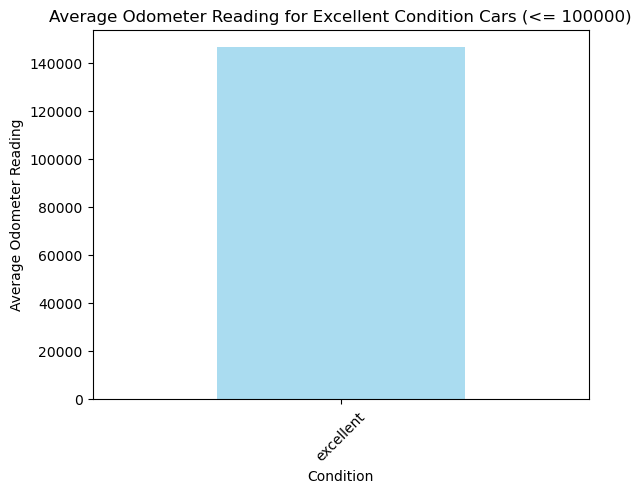

In [9]:
under_50 = car_ad_df[(car_ad_df['condition'] == 'excellent') & (car_ad_df['odometer'] >= 100000)]

grouped = under_50.groupby('condition')['odometer'].mean()

# Step 3: Plot the bar chart
grouped.plot(kind='bar', alpha=0.7, color='skyblue')
plt.title('Average Odometer Reading for Excellent Condition Cars (<= 100000)')
plt.xlabel('Condition')
plt.ylabel('Average Odometer Reading')
plt.xticks(rotation=45)
plt.show()





price  model_year  model                     condition  cylinders  fuel  odometer  transmission  type         paint_color  is_4wd  date_posted  days_listed
1      2000.0      ford mustang              excellent  8.0        gas   103000.0  manual        convertible  silver       0.0     2018-08-17   56             1
10995  2008.0      jeep wrangler unlimited   excellent  6.0        gas   140000.0  automatic     SUV          silver       1.0     2019-02-20   112            1
       2011.0      bmw x5                    excellent  6.0        gas   114000.0  automatic     SUV          silver       1.0     2019-01-29   22             1
                   chevrolet camaro          excellent  6.0        gas   100326.0  automatic     coupe        Unkown       0.0     2018-10-22   24             1
                   chevrolet silverado 1500  excellent  8.0        gas   123025.0  automatic     pickup       red          1.0     2018-06-16   71             1
                                       

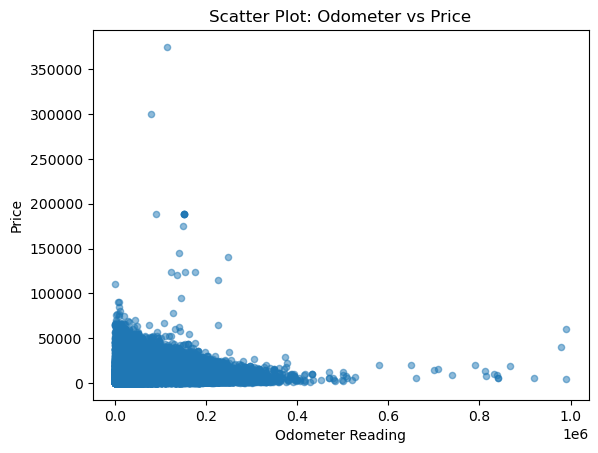

In [10]:
#the actual value count for excellent condition cars over 100k miles
cars_under100 = car_ad_df[(car_ad_df['condition'] == 'excellent') & (car_ad_df['odometer'] >= 100000)].value_counts()

print(cars_under100)


# Create a scatter plot for 'odometer' vs 'price'
car_ad_df.plot(kind='scatter', x='odometer', y='price', alpha=0.5)

# Optional: Add titles and labels
plt.title('Scatter Plot: Odometer vs Price')
plt.xlabel('Odometer Reading')
plt.ylabel('Price')

# Display the plot
plt.show()


Question 1.) How many cars over 100k miles are in excelllent condition? 
Answer: there are 4,096 cars that are over 100k miles & in excellent condition out of the 51,525 cars in our database.

Question 2.) How many cars fit this crtieria: the model year 2010 and over, are a manual transmission, are a truck, suv, or pickup?

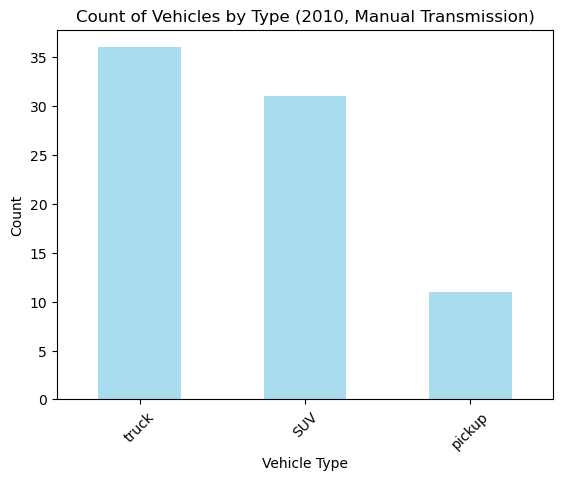

In [11]:
cars_q2 = car_ad_df[
    (car_ad_df['model_year'] == 2010) & 
    (car_ad_df['transmission'] == 'manual') & 
    (car_ad_df['type'].isin(['SUV', 'truck', 'pickup']))
]

type_counts = cars_q2['type'].value_counts()

# Plot a bar chart
type_counts.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Count of Vehicles by Type (2010, Manual Transmission)')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [12]:
print(cars_q2.shape[0])

78


Question 2.) How many cars fit this crtieria: the model year 2010 and over, are a manual transmission, are a truck, suv, or pickup?
Answer: There are 62 cars in our database that fit this criteria. 

Question 3.) What's the average amount of days convertibles are listed? 


In [13]:
cars_q3 = car_ad_df[car_ad_df['type'] == 'convertible'] 
cars_q3_av = cars_q3['days_listed'].mean()

print(cars_q3_av)



39.19282511210762


Question 3.) What's the average amount of days convertibles are listed? 
Answer: Convertible cars are listed in the database for an average of 39 days. 

In [14]:
print(car_ad_df['price'].sample(5))

33604    31495
4480      7000
35166     6800
7904     30000
14164     9900
Name: price, dtype: int64


#Question 4 updated hypothesis 
Question 4.) 
Hypothesis 1: 'the average odometer value of cars in excellent condition and cars in like new and new condition are the same' 
Alternate Hypothesis : 'the average odomenter value of cars in excellent condition is less then cars in like new and new condition'

In [15]:



alpha = 0.05 



In [16]:
car_under_avr = under_50['odometer'].mean()
print(car_under_avr)

146350.4622218904


In [17]:
from scipy import stats as st
import numpy as np

In [18]:
#updated t-test approach from question 4 
#make 2 distint samples ; cars in excellent condition and cars in like new and new condition 

cars_ex_q4 = car_ad_df[
    (car_ad_df['condition'] == 'excellent') & (car_ad_df['odometer'] )
]

cars_ln_q4 = car_ad_df[
    (car_ad_df['condition'].isin(['like new', 'new'])) & (car_ad_df['odometer'] )
]

from scipy.stats import ttest_ind

result = ttest_ind(
    cars_ex_q4['odometer'],  
    cars_ln_q4['odometer'],  
    alternative= 'greater'       
)

print('t-statistic:', result.statistic)
print('p-value:', result.pvalue)
# Check the conclusion
if result.pvalue < 0.05:
    print("Reject the null hypothesis: The average odometer for 'excellent' is less than for 'like new' or 'excellent'.")
else:
    print("Fail to reject the null hypothesis.")

t-statistic: 31.54493595410004
p-value: 3.83566683673047e-215
Reject the null hypothesis: The average odometer for 'excellent' is less than for 'like new' or 'excellent'.


#Question 4 updated hypothesis v2
Question 4.) 
Hypothesis 1: 'the average odometer value of cars in excellent condition and cars in like new and new condition are the same' 
Alternate Hypothesis : '"The average odometer for cars in 'excellent' condition is greater than that for cars in 'new' or 'like new' condition."

Answer: Indeed cars in excellent condition tend to have more mileage then cars in new or like new condition. 

In [19]:
print(cars_under100.head())

price  model_year  model                     condition  cylinders  fuel  odometer  transmission  type         paint_color  is_4wd  date_posted  days_listed
1      2000.0      ford mustang              excellent  8.0        gas   103000.0  manual        convertible  silver       0.0     2018-08-17   56             1
10995  2008.0      jeep wrangler unlimited   excellent  6.0        gas   140000.0  automatic     SUV          silver       1.0     2019-02-20   112            1
       2011.0      bmw x5                    excellent  6.0        gas   114000.0  automatic     SUV          silver       1.0     2019-01-29   22             1
                   chevrolet camaro          excellent  6.0        gas   100326.0  automatic     coupe        Unkown       0.0     2018-10-22   24             1
                   chevrolet silverado 1500  excellent  8.0        gas   123025.0  automatic     pickup       red          1.0     2018-06-16   71             1
Name: count, dtype: int64


In [20]:
##WebAppCode
### UPdated Code in The App.py File 


import streamlit as st
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

from PIL import Image

#############
# Page Title
############

image = Image.open('/Users/macos/Downloads/JOJO’s DEALER LIST.png')

st.markdown("""
#Our Car Dealership 
         a simple sda project on a car dealership
         
         
         """)

##################

df = pd.read_csv('/Users/macos/Downloads/vehicles_us.csv')
df['manufacturer'] = df['model'].apply(lambda x: x.split()[0])

st.header('Data viewer')
show_manuf_1k_ads = st.checkbox('Include manufacturers with less than 1000 ads')
if not show_manuf_1k_ads:
    df = df.groupby('manufacturer').filter(lambda x: len(x) > 1000)

st.dataframe(df)
st.header('Vehicle types by manufacturer')
st.write(px.histogram(df, x='manufacturer', color='type'))
st.header('Histogram of `condition` vs `model_year`')

# -------------------------------------------------------
# histograms in plotly:
# fig = go.Figure()
# fig.add_trace(go.Histogram(x=df[df['condition']=='good']['model_year'], name='good'))
# fig.add_trace(go.Histogram(x=df[df['condition']=='excellent']['model_year'], name='excellent'))
# fig.update_layout(barmode='stack')
# st.write(fig)
# works, but too many lines of code
# -------------------------------------------------------

# histograms in plotly_express:
st.write(px.histogram(df, x='model_year', color='condition'))
# a lot more concise!
# -------------------------------------------------------

st.header('Compare price distribution between manufacturers')
manufac_list = sorted(df['manufacturer'].unique())
manufacturer_1 = st.selectbox('Select manufacturer 1',
                              manufac_list, index=manufac_list.index('chevrolet'))

manufacturer_2 = st.selectbox('Select manufacturer 2',
                              manufac_list, index=manufac_list.index('hyundai'))
mask_filter = (df['manufacturer'] == manufacturer_1) | (df['manufacturer'] == manufacturer_2)
df_filtered = df[mask_filter]
normalize = st.checkbox('Normalize histogram', value=True)
if normalize:
    histnorm = 'percent'
else:
    histnorm = None
st.write(px.histogram(df_filtered,
                      x='price',
                      nbins=30,
                      color='manufacturer',
                      histnorm=histnorm,
                      barmode='overlay'))

########
#New Web App Function 
########
data_comp = {
    'model_year': df['model_year'],
    'odometer' : df['odometer']


}

df_comp = pd.DataFrame(data_comp)

# Streamlit App
st.header('Compare Vehicle Year to Mileage')


# Dropdown for selecting vehicle year
veh_list = sorted(df_comp['model_year'].unique())
selected_year = st.selectbox('Select vehicle year', veh_list)

# Filter the data for the selected year
filtered_df_comp = df_comp[df_comp['model_year'] == selected_year]

# Display filtered data
st.subheader(f"Vehicles from year {selected_year}")
st.write(filtered_df_comp)

# Categorize and display odometer readings
st.subheader("Mileage Categories")
for index, row in filtered_df_comp.iterrows():
    mileage = row['odometer']
    if mileage <= 10000:
        st.write(f"Vehicle with mileage {mileage} miles: **Under 10k**")
    elif mileage <= 35000:
        st.write(f"Vehicle with mileage {mileage} miles: **Under 35k**")
    elif mileage <= 50000:
        st.write(f"Vehicle with mileage {mileage} miles: **Under 50k**")
    elif mileage <= 75000:
        st.write(f"Vehicle with mileage {mileage} miles: **Under 75k**")  
    elif mileage <= 100000:
        st.write(f"Vehicle with mileage {mileage} miles: **Under 100k**")      
    else:
        st.write(f"Vehicle with mileage {mileage} miles: **Above 100k**")



###New Web Function###




# Streamlit App
st.title("Vehicle Database Analysis")

# Dropdown for selecting vehicle type
vehicle_types_ = df['type'].unique()
selected_type_ = st.selectbox("Select Vehicle Type", vehicle_types_, index=0)

# Filter the DataFrame based on the selected type
filtered_df_no = df[df['type'] == selected_type_]

# Display filtered data
st.subheader(f"Vehicles of type '{selected_type_}'")
st.write(filtered_df_no)

# Create a bar chart to display the count of vehicles for each model year
st.subheader("Vehicle Count by Model Year")
if not filtered_df_no.empty:
    vehicle_count = filtered_df_no['model_year'].value_counts().reset_index()
    vehicle_count.columns = ['model_year', 'count']

    # Plot using Plotly
    fig = px.bar(
        vehicle_count,
        x='model_year',
        y='count',
        title=f"Number of {selected_type_}s by Model Year",
        labels={'model_year': 'Model Year', 'count': 'Number of Vehicles'},
    )
    st.plotly_chart(fig)
else:
    st.write(f"No vehicles of type '{selected_type_}' found in the database.")

    


FileNotFoundError: [Errno 2] No such file or directory: '/Users/macos/Downloads/JOJO’s DEALER LIST.png'

In [ ]:
print(df.head())

   price  model_year           model  condition  cylinders fuel  odometer  \
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
6  12990      2015.0    toyota camry  excellent        4.0  gas   79212.0   
7  15990      2013.0     honda pilot  excellent        6.0  gas  109473.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  \
1    automatic  pickup       white     1.0  2018-10-19           50   
2    automatic   sedan         red     NaN  2019-02-07           79   
3    automatic  pickup         NaN     NaN  2019-03-22            9   
6    automatic   sedan       white     NaN  2018-12-27           73   
7    automatic     SUV       black     1.0  2019-01-07           68   

  manufacturer  
1         ford  
2      hyundai  
3         ford  
6       toyota  
7        honda  
